In [45]:
import katdal
import numpy as np
import matplotlib.pyplot as plt
import itertools
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [100]:
h5 = katdal.open('/data/sean/1451995933.h5')

#h5 = katdal.open('/var/kat/archive/data/comm/2014/06/08/1402187923.h5')
h5.select()

h5.select(pol='v')
#h5.select(scans='track',targets='PKS1934-638')
N_ants = len(h5.ants)
antA = [h5.inputs.index(inpA) for inpA, inpB in h5.corr_products]
antB = [h5.inputs.index(inpB) for inpA, inpB in h5.corr_products]
full_vis = (np.concatenate((h5.vis[:], (h5.vis[:]).conj()), axis=-1))
full_antA = np.r_[antA, antB]
full_antB = np.r_[antB, antA]
corrprods = zip(full_antA,full_antB)
up = {}
for i,(x,y)  in enumerate(zip(full_antA,full_antB)):
    up[x,y]=i
    up[y,x]=i


The Phase relationship equation is:

$ \Phi_{12}  = \phi_{1} - \phi_{2} +  \phi_{12}  $

$ \Phi_{13}  = \phi_{1} - \phi_{3} +  \phi_{13}  $

$ \Phi_{23}  = \phi_{2} - \phi_{3} +  \phi_{23}  $

$ \Phi_{12} - \Phi_{13} + \Phi_{23} =  \phi_{12} - \phi_{13} +\phi_{23} $

For a point source at the centre of the beam, $\phi_{12} = \phi_{13} = \phi_{23} = 0 $

In [102]:
def anglemean(th,axis=None):
    """ Return the mean of angles
    Multiply angles by 2 for an directionless orentation
    eg. polorisation """
    sa = np.nansum(np.sin(th),axis=axis)
    ca = np.nansum(np.cos(th),axis=axis)
    return np.arctan2(sa,ca)

list_a123 = []
l1,l2,l3 = [],[],[]

for a1,a2,a3 in itertools.combinations(set( full_antA), 3):
    print a1,a2,a3
    #a123 =  np.angle(full_vis[:,:,up[a1,a2]])-np.angle(full_vis[:,:,up[a1,a3]]) +np.angle(full_vis[:,:,up[a2,a3]] )
    l1.append(up[a1,a2])
    l2.append(up[a1,a3])
    l3.append(up[a2,a3])
    #plot(np.degrees(np.angle(np.exp(1j *a123[:,200:800]).mean(axis=1))))

a123 =  anglemean(np.rollaxis(np.angle(full_vis[:,:,l1])-np.angle(full_vis[:,:,l2]) +np.angle(full_vis[:,:,l3]),0,2  ).reshape(full_vis.shape[1],-1)  ,axis=1 ) 

0 1 2


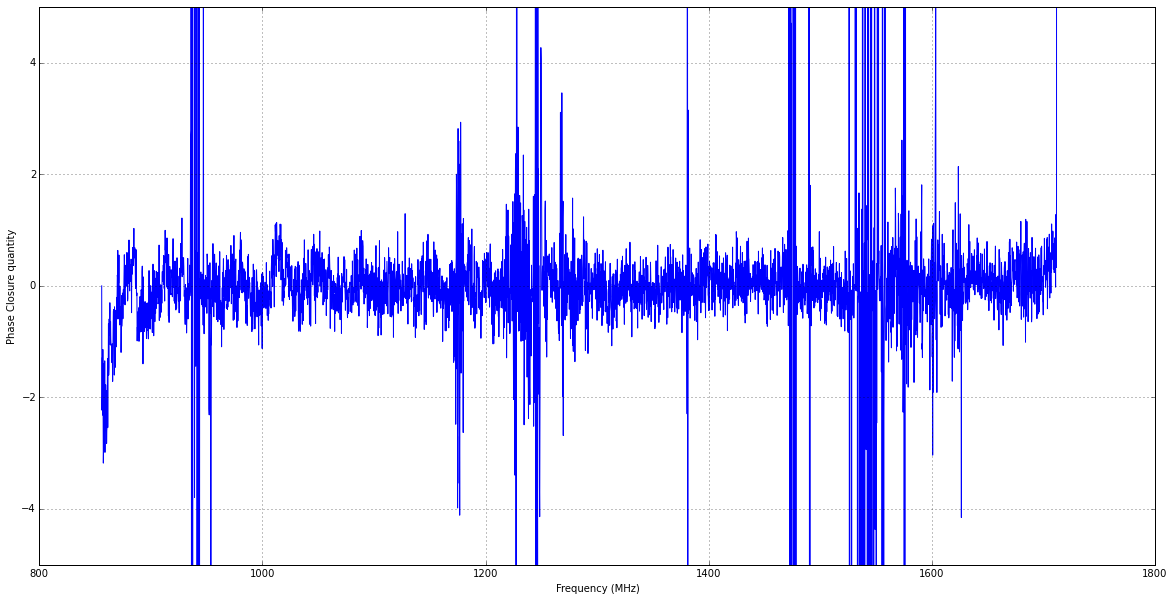

In [103]:
plt.figure(figsize=(20,10))
plot(h5.channel_freqs/1e6,np.degrees(a123) )
#plt.ylim(np.nanpercentile(a123,), np.nanpercentile(a123,99) )
plt.ylim(-5,5)
plt.grid(True)
plt.ylabel('Neam Phase Closure angle(degrees)')
plt.xlabel('Frequency (MHz)')

The Amplitude relationship equation is:

$ A_{12}  = a_{1}a_{2}^{*}a_{12}S_{12}  $

$ A_{13}  = a_{1}a_{3}^{*}a_{13}S_{13}  $

$ A_{24}  = a_{2}a_{4}^{*}a_{24}S_{24}  $

$ A_{34}  = a_{3}a_{4}^{*}a_{34}S_{34}  $
 

$ \frac{A_{12}A_{34}}{A_{13}A_{24}} =  \frac{a_{12}a_{34}}{a_{13}a_{24}} S $

For a point source , $S_{12} = S_{13} = S_{24} = S_{34} = S $

In [104]:
list_a1234 = []
l1,l2,l3,l4 = [],[],[],[]

for a1,a2,a3,a4 in itertools.combinations(set( full_antA), 4):
    l1.append(up[a1,a2])
    l2.append(up[a1,a3])
    l3.append(up[a2,a4])
    l4.append(up[a3,a4])

a1234 =  np.nanmean(np.rollaxis((np.abs(full_vis[:,:,l1])*np.abs(full_vis[:,:,l4]))/(np.abs(full_vis[:,:,l2])*np.abs(full_vis[:,:,l3] ) ) ,0,2).reshape(full_vis.shape[1],-1),axis=-1) 

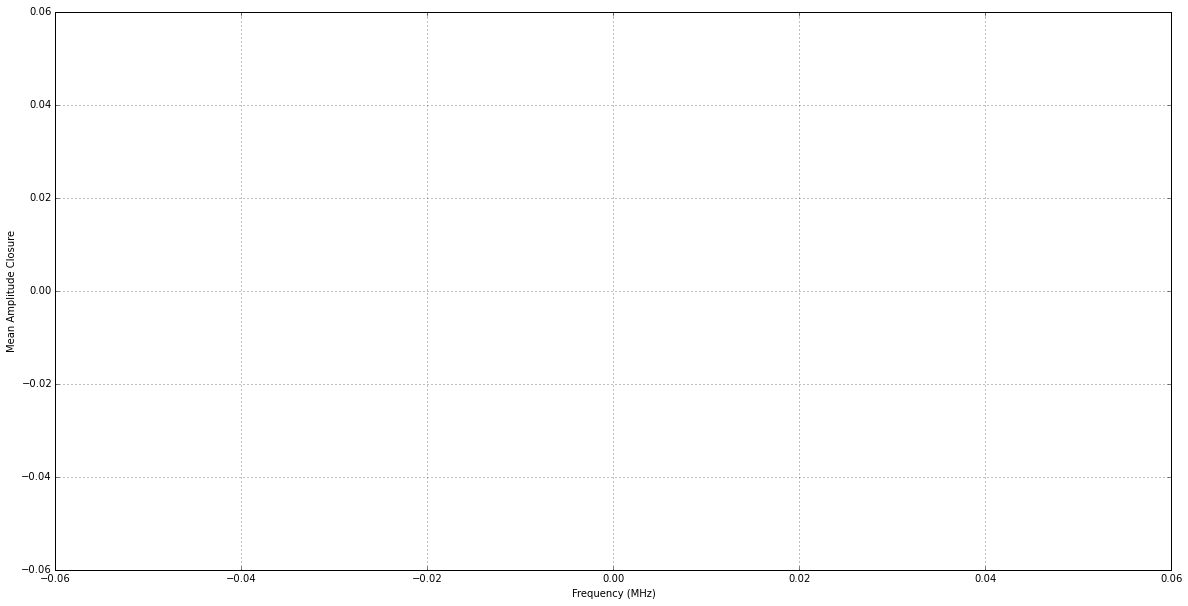

In [106]:

plt.figure(figsize=(20,10))
plot(h5.channel_freqs/1e6,a1234 )
plt.grid(True)
#plt.ylim(np.nanpercentile(a1234,10), np.nanpercentile(a1234,90) )
plt.ylabel('Mean Amplitude Closure ')
plt.xlabel('Frequency (MHz)')